# Machine Learning for Classification

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
#!/bin/bash
!curl -L -o churn.zip https://www.kaggle.com/api/v1/datasets/download/blastchar/telco-customer-churn
!unzip churn.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  171k  100  171k    0     0  11537      0  0:00:15  0:00:15 --:--:-- 27765
Archive:  churn.zip
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  


In [11]:
df = pd.read_csv("data.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [18]:
df.columns = df.columns.str.lower().str.replace(" ", '_')

categorical_columns = list(df.dtypes[df.dtypes == "object"].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(" ", "_")

In [20]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [19]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [24]:
tc = pd.to_numeric(df.totalcharges, errors='coerce')

In [25]:
df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [26]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors="coerce")
df.totalcharges = df.totalcharges.fillna(0)

In [27]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [29]:
df.churn = (df.churn=='yes').astype(int)

### Setting up the validation Framework

In [31]:
!uv add scikit-learn

Resolved 51 packages in 44.49s                                       
⠙ Preparing packages... (0/4)                                                   
⠙ Preparing packages... (0/4)-------     0 B/18.20 KiB                  
⠙ Preparing packages... (0/4)2m----- 14.91 KiB/18.20 KiB                
⠙ Preparing packages... (0/4)--- 18.20 KiB/18.20 KiB                
threadpoolctl ------------------------------ 18.20 KiB/18.20 KiB
⠙ Preparing packages... (0/4)----     0 B/301.17 KiB                    
⠙ Preparing packages... (0/4)----     0 B/301.17 KiB                    
⠹ Preparing packages... (1/4)---- 16.00 KiB/301.17 KiB                  
⠹ Preparing packages... (1/4)---- 16.00 KiB/301.17 KiB                  
⠹ Preparing packages... (1/4)---- 28.24 KiB/301.17 KiB                  
joblib     ------------------------------ 28.24 KiB/301.17 KiB
⠹ Preparing packages... (1/4)------     0 B/9.04 MiB                    
joblib     ------------------------------ 28.24 KiB/301.17 KiB
sciki

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [34]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [35]:
len(df_train), len(df_test), len(df_val)

(4225, 1409, 1409)

In [36]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [37]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [38]:
del df_train["churn"]
del df_val["churn"]
del df_test["churn"]

### Exploratory Data Analysis

In [40]:
df_full_train.reset_index(drop=True,inplace=True)

In [41]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [43]:
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [46]:
global_churn_rate = df_full_train.churn.mean() # Chrun Rate 
round(global_churn_rate, 2)

np.float64(0.27)

In [48]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [55]:
categorical = list(filter(lambda x: x not in numerical + ["churn", 'customerid'], df_full_train.columns.to_list()))
categorical

['gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

In [53]:
numerical

['tenure', 'monthlycharges', 'totalcharges']

In [54]:
df_full_train[categorical].nunique()

customerid          5634
gender                 2
seniorcitizen          2
partner                2
dependents             2
phoneservice           2
multiplelines          3
internetservice        3
onlinesecurity         3
onlinebackup           3
deviceprotection       3
techsupport            3
streamingtv            3
streamingmovies        3
contract               3
paperlessbilling       2
paymentmethod          4
dtype: int64

### Feature Importance: Churn Rate and Risk Ratio

In [56]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [59]:
churn_female = df_full_train[df_full_train.gender=="female"].churn.mean()
churn_female

np.float64(0.27682403433476394)

In [60]:
churn_male = df_full_train[df_full_train.gender=="male"].churn.mean()
churn_male

np.float64(0.2632135306553911)

In [61]:
df_full_train.partner.value_counts()

partner
no     2932
yes    2702
Name: count, dtype: int64

In [62]:
churn_partner = df_full_train[df_full_train.partner == "yes"].churn.mean()
churn_partner

np.float64(0.20503330866025166)

In [63]:
churn_no_partner = df_full_train[df_full_train.partner == "no"].churn.mean()
churn_no_partner

np.float64(0.3298090040927694)

Feature Importance

1. Difference<br>
$$ Global - Group$$
if it is less than zero. the group is more likely to chrun and if it is less than zero, the group is less likely to churn 
2. Risk Ratio<br>
$$Risk = {Group churn rate/global churn rate} $$
if it is greater than one they are more likely to churn and if it is less than one they are less likely to churn.

In [64]:
churn_partner / global_churn_rate

np.float64(0.7594724924338315)

```sql
SELECT
    gender,
    AVG(churn), 
    AVG(churn) - global_churn AS diff,
    AVG(churn) / global_churn AS risk
FROM
    data
GROUP BY
    gender;
```

In [ ]:
from IPython.display import display

In [69]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


## Feature Importance: Mutal Information

In [70]:
from sklearn.metrics import mutual_info_score

In [71]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [73]:
mutual_info_score(df_full_train.churn, df_full_train.gender)

0.0001174846211139946

In [75]:
mutual_info_score(df_full_train.churn, df_full_train.partner)

0.009967689095399745

In [76]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)    
df_full_train[categorical].apply(mutual_info_churn_score)

gender              0.000117
seniorcitizen       0.009410
partner             0.009968
dependents          0.012346
phoneservice        0.000229
multiplelines       0.000857
internetservice     0.055868
onlinesecurity      0.063085
onlinebackup        0.046923
deviceprotection    0.043453
techsupport         0.061032
streamingtv         0.031853
streamingmovies     0.031581
contract            0.098320
paperlessbilling    0.017589
paymentmethod       0.043210
dtype: float64

In [78]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

### Feature Importance: Correlation

In [80]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [82]:
df_full_train[df_full_train.tenure <=2].churn.mean()

np.float64(0.5953420669577875)

In [84]:
df_full_train[(df_full_train.tenure >2) & (df_full_train.tenure <=12)].churn.mean()

np.float64(0.3994413407821229)

In [85]:
df_full_train[df_full_train.tenure > 12].churn.mean()

np.float64(0.17634908339788277)

### One hot encoding

In [86]:
from sklearn.feature_extraction import DictVectorizer

In [124]:
train_dicts = df_train[numerical + categorical].to_dict(orient="records")

In [125]:
dv = DictVectorizer(sparse=False)

In [126]:
dv.fit(train_dicts)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [127]:
X_train = dv.transform(train_dicts)

In [128]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [154]:
val_dicts = df_val[numerical + categorical].to_dict(orient="records")
test_dicts = df_test[numerical + categorical].to_dict(orient="records")

In [155]:
X_val = dv.fit_transform(val_dicts)
X_test = dv.fit_transform(test_dicts)

### Logistic Regression

In [156]:
def sigmoid(z):
    return 1/(1+np.exp(-z))
z = np.linspace(-7, 7, 51)

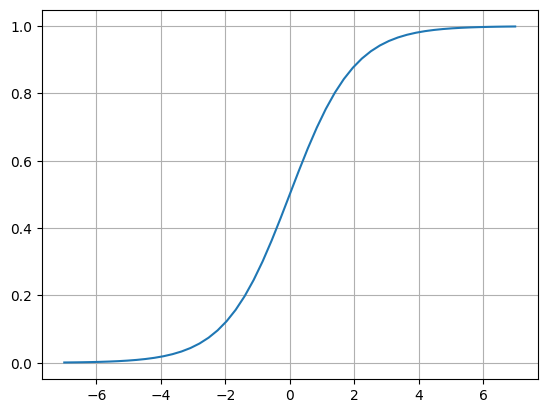

In [157]:
plt.plot(z, sigmoid(z))
plt.grid(True, which="major")

### Training Logistic regression in Scikit-Learn

In [158]:
from sklearn.linear_model import LogisticRegression

In [159]:
X_train.shape, y_train.shape

((4225, 45), (4225,))

In [160]:
model = LogisticRegression()
model.fit(X_train, y_train)

/home/mangino/Documents/Projects/MLZoomcamp/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [161]:
model.intercept_

array([-0.11092874])

In [162]:
y_pred = model.predict_proba(X_train)[:,1]

In [163]:
y_pred_val = model.predict_proba(X_val)[:, 1]

In [164]:
churn_decision = (y_pred_val >= 0.5)

In [165]:
y_val.shape, churn_decision.shape, X_val.shape

((1409,), (1409,), (1409, 45))

In [166]:
(y_val == churn_decision).mean()

np.float64(0.801277501774308)

In [ ]:
y_val

In [145]:
churn_decision.astype(int)

array([0, 1, 1, ..., 1, 0, 1], shape=(4225,))

In [167]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred_val
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [168]:
df_pred

,probability,prediction,actual
0,0.007863,0,0
1,0.209928,0,0
2,0.223710,0,0
3,0.561123,1,1
4,0.219586,0,0
...,...,...,...
1404,0.297790,0,0
1405,0.035463,0,1
1406,0.150149,0,0
1407,0.776681,1,1


In [169]:
df_pred['correct'] = df_pred.prediction == df_pred.actual
df_pred

,probability,prediction,actual,correct
0,0.007863,0,0,True
1,0.209928,0,0,True
2,0.223710,0,0,True
3,0.561123,1,1,True
4,0.219586,0,0,True
...,...,...,...,...
1404,0.297790,0,0,True
1405,0.035463,0,1,False
1406,0.150149,0,0,True
1407,0.776681,1,1,True
